In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"


In [2]:
#You need a data set. So, you can build a random data set.
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 1000)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

#You then fit the normal regression model to the data set.
regr_1 = DecisionTreeRegressor(max_depth=4)

#You then also apply an AdaBoost model to the data set. The parameters can be
#changed, if you want to experiment.
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

#You then train the model.
regr_1.fit(X, y)
regr_2.fit(X, y)

#You activate the predict.
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000002668EA0FEA0>)

<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Data')

Text(0, 0.5, 'Target')

Text(0.5, 1.0, 'Boosted Decision Tree Regression')

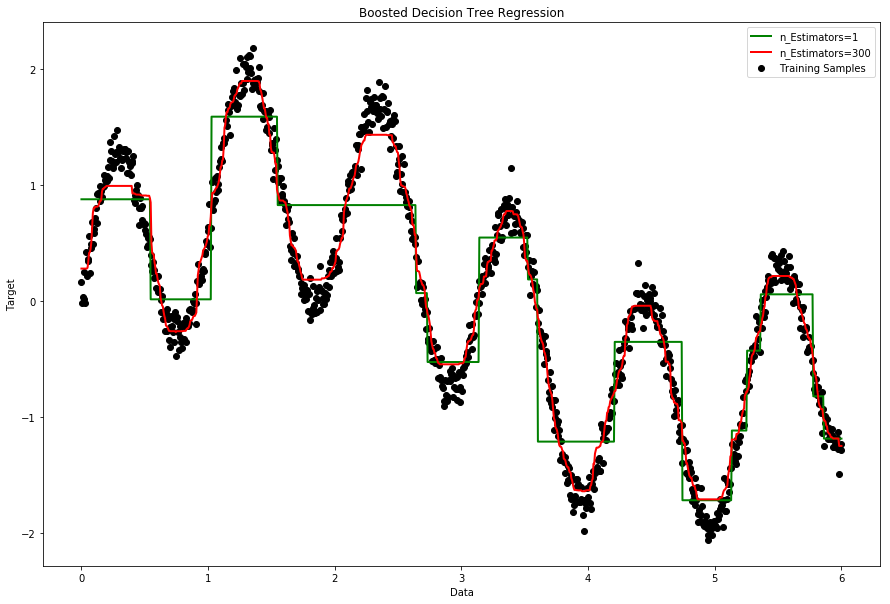

In [3]:
#You plot the results.
plt.figure(figsize=(15, 10))
plt.scatter(X, y, c="k", label="Training Samples")
plt.plot(X, y_1, c="g", label="n_Estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_Estimators=300", linewidth=2)
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()